In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.io import loadmat
from scipy.optimize import minimize
# theme
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


## Visualizing the data

In [2]:
data = loadmat('res/ex3data1.mat')
print data.keys()

['y', 'X', '__version__', '__header__', '__globals__']


In [3]:
X = data['X']; y= data['y']

In [4]:
print X.shape
print y.shape

(5000L, 400L)
(5000L, 1L)


In [5]:
m = X.shape[0]
rand_indices= np.random.permutation(np.arange(m))
sel = X[rand_indices[0:100],:]

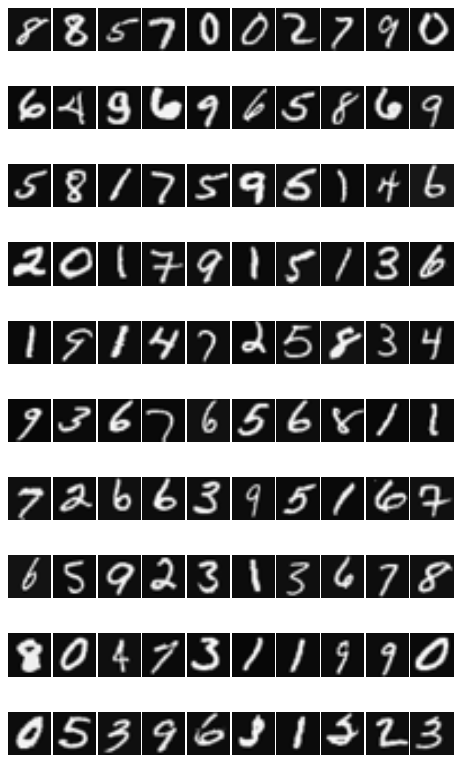

In [6]:
def plot_gallery(images, h=20, w=20, n_row=10, n_col=10):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(0.8 * n_col, 1.4 * n_row))
    plt.subplots_adjust(wspace=0.01,hspace=0.01)
    #plt.tight_layout()
    for i in range(n_row * n_col):        
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
plot_gallery(sel)

## Model representation

![Neural Network](image/nn.png)

#### Input layer: 400 inputs 
#### Hidden layer: 25
#### Output layer: 10

In [7]:
# reading pre-trained weights
w = loadmat('res/ex4weights.mat')
print w.keys()

['Theta2', '__version__', '__header__', 'Theta1', '__globals__']


In [8]:
Theta1 = w['Theta1']
Theta2 = w['Theta2']

In [10]:
print Theta1.shape
print X.shape
print Theta2.shape

(25L, 401L)
(5000L, 400L)
(10L, 26L)


#### Cost function for neural networks

#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}\big[-y^{(i)}_{k}\, log\,(( h_\theta\,(x^{(i)}))_k)-(1-y^{(i)}_k)\,log\,(1-h_\theta(x^{(i)}))_k)\big]$$




In [12]:
def nnCostFunction(nn_params,input_layer_size,hidden_layer_size,
                   num_labels,X,y,reg):
    # reshaping nn_params into Theta1,Theta2
    Theta1 = nn_params.reshape((0,hidden_layer_size * (input_layer_size, hidden_layer_size,input_layer_size)))
    Theta2 = nn_param.reshape(())
                        
    

#### Regularized Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}\bigg[-y^{(i)}_{k}\, log\,(( h_\theta\,(x^{(i)}))_k)-(1-y^{(i)}_k)\,log\,(1-h_\theta(x^{(i)}))_k)\bigg] + \frac{\lambda}{2m}\bigg[\sum_{j=1}^{25}\sum_{k=1}^{400}(\Theta_{j,k}^{(1)})^2+\sum_{j=1}^{10}\sum_{k=1}^{25}(\Theta_{j,k}^{(2)})^2\bigg]$$